In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
from matplotlib import style

In [18]:
dataframe= pd.read_csv("Desktop/Ibm attrition data/1576148666_ibmattritiondata/IBM Attrition Data.csv")

In [19]:
df = dataframe

In [20]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [21]:
names= df.columns.values
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


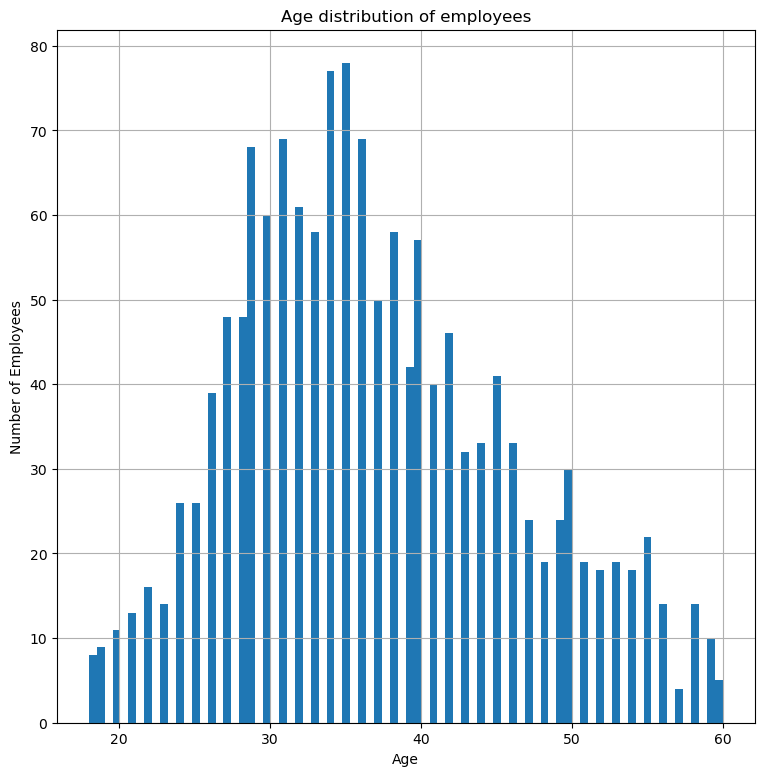

In [26]:
plt.figure(figsize=(9,9))
dataframe["Age"].hist(bins=80)
plt.title("Age distribution of employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()


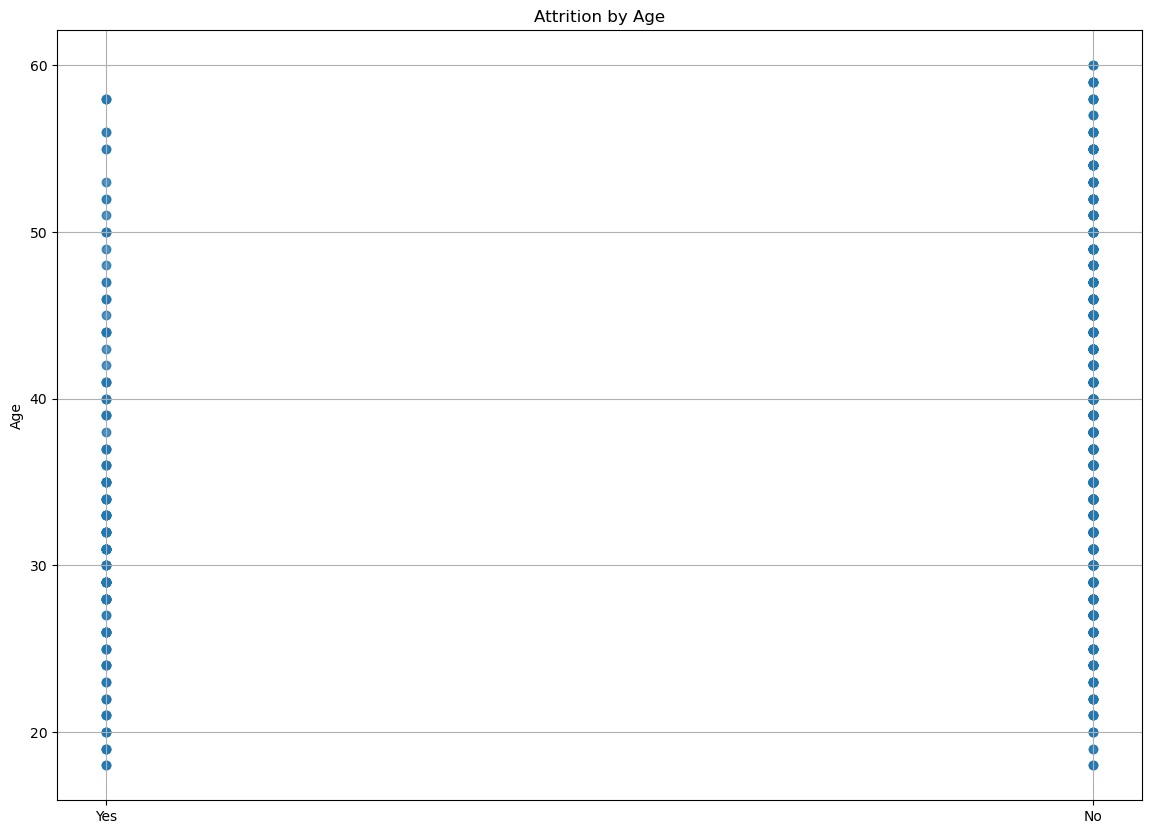

In [84]:
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age,alpha=.55)
plt.title("Attrition by Age")
plt.ylabel("Age")
plt.grid()
plt.show()

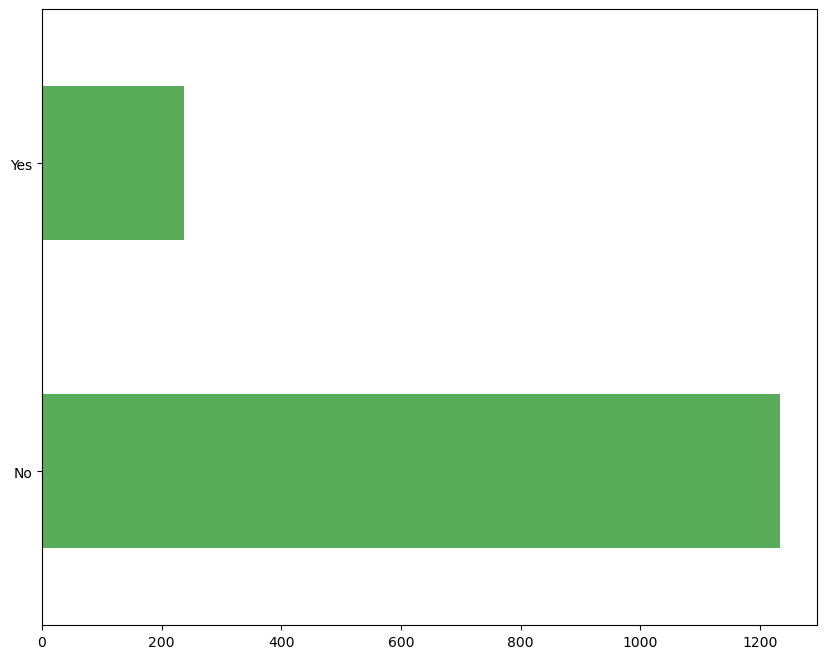

In [87]:
plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot(kind= "barh", color="green",alpha=.65)
plt.title="Attrition breakdown"
plt.show()


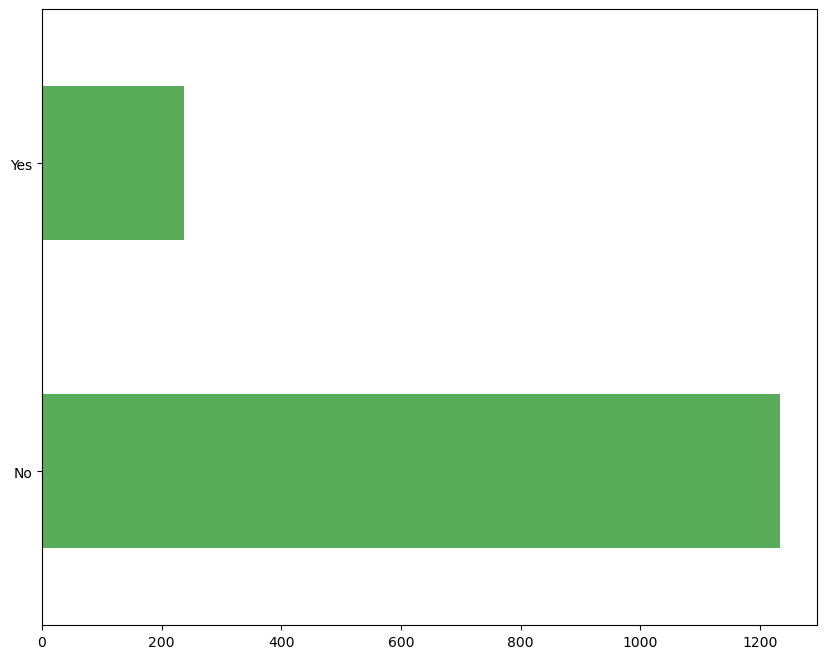

In [87]:
plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot(kind= "barh", color="green",alpha=.65)
plt.title="Attrition breakdown"
plt.show()


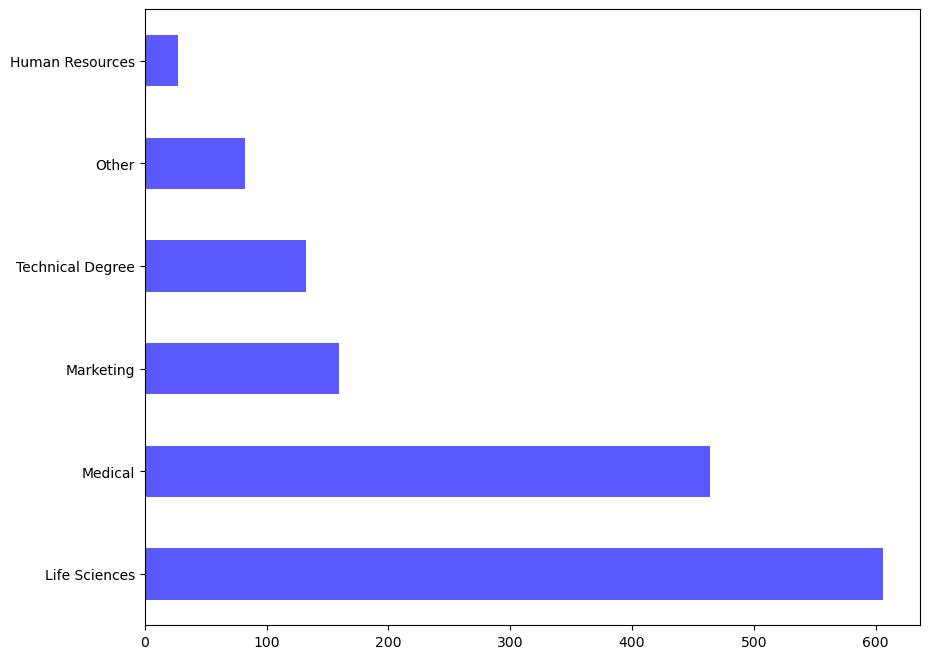

In [89]:
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind= "barh", color="b",alpha=.65)
plt.title="Education Field Distribution"
plt.show()

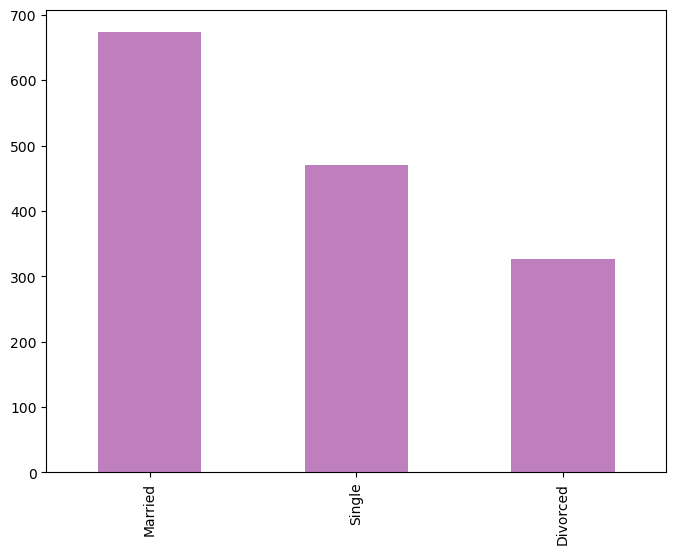

In [92]:
plt.figure(figsize=(8,6))
df.MaritalStatus.value_counts().plot(kind= "bar", color="purple",alpha=.5)
plt.title="Maritsl Status"
plt.show()


In [94]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [95]:
df.info

<bound method DataFrame.info of       Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisf

In [96]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [97]:
df.std()

C:\Users\HP\AppData\Local\Temp\ipykernel_12524\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [98]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [100]:
df['Attrition'].dtype

dtype('O')

In [101]:
dataframe['Attrition'].replace('Yes',1, inplace=True)
dataframe['Attrition'].replace('No',0, inplace=True)

In [104]:
df.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [110]:
X= df.drop(['Attrition'],axis= 1)
X.head()
Y=df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [112]:
dataframe['EducationField'].replace('Life Sciences',1, inplace=True)
dataframe['EducationField'].replace('Medical',2, inplace=True)
dataframe['EducationField'].replace('Marketing', 3, inplace=True)
dataframe['EducationField'].replace('Other',4, inplace=True)
dataframe['EducationField'].replace('Technical Degree',5, inplace=True)
dataframe['EducationField'].replace('Human Resources', 6, inplace=True)

In [115]:
df['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [116]:
dataframe['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [117]:
dataframe['Department'].replace('Research & Development',1, inplace=True)
dataframe['Department'].replace('Sales',2, inplace=True)
dataframe['Department'].replace('Human Resources', 3, inplace=True)

In [118]:
dataframe['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [119]:
dataframe['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [120]:
dataframe['MaritalStatus'].replace('Married',1, inplace=True)
dataframe['MaritalStatus'].replace('Single',2, inplace=True)
dataframe['MaritalStatus'].replace('Divorced',3, inplace=True)

In [121]:
dataframe['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [122]:
x=dataframe.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [125]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [126]:
y=dataframe['Attrition']

In [127]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [128]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [129]:
y = np.ravel(y)

In [131]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)


In [132]:
model.score(x,y)

0.8408163265306122

In [134]:
y.mean()

0.16122448979591836

In [137]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [163]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [152]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179622 0.13820378]
 [0.80754592 0.19245408]
 [0.74123929 0.25876071]
 [0.83441338 0.16558662]
 [0.73499935 0.26500065]
 [0.7909774  0.2090226 ]
 [0.85615196 0.14384804]
 [0.85699669 0.14300331]
 [0.96699058 0.03300942]
 [0.93685211 0.06314789]
 [0.95099279 0.04900721]
 [0.83101549 0.16898451]
 [0.86296557 0.13703443]
 [0.86581193 0.13418807]
 [0.88750605 0.11249395]
 [0.88892616 0.11107384]
 [0.88569727 0.11430273]
 [0.78516582 0.21483418]
 [0.7979449  0.2020551 ]
 [0.88511305 0.11488695]
 [0.70651586 0.29348414]
 [0.94676694 0.05323306]
 [0.86736253 0.13263747]
 [0.84276451 0.15723549]
 [0.60336833 0.39663167]
 [0.811292   0.188708  ]
 [0.91813732 0.08186268]
 [0.93285522 0.06714478]
 [0.68230748 0.31769252]
 [0.8702714  0.1297286 ]
 [0.87266386 0.12733614]
 [0.76968737 0.23031263]
 [0.86435776 0.13564224]
 [0.95758882 0.04241118]
 [0.84461487 0.15538513]
 [0.86719349 0.13280651]
 [0.90465984 0.09534016]
 [0.68936422 0.31063578]
 [0.90703619 0.09296381]
 [0.80663474 0.19336526]


In [153]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:,1]))

0.8435374149659864
0.6502502887947632


In [154]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [155]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [164]:

gg=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(gg))

[[6.25571824e-07 9.99999374e-01]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
